In [16]:
import pandas as pd
import geopandas as gpd
from h3_utils import *
import h3
import h3pandas

from matplotlib import pyplot as plt

from sklearn.cluster import KMeans

In [4]:
data = gpd.read_parquet('../data/nga_ss_hex8.parquet')

In [5]:
data.head()

,hex8,ntl_sum,pop_sum,LST mean,geometry,land cover
0,8858890d61fffff,213.364904,0.000000,30.472530,"POLYGON ((7.12134 6.83952, 7.12025 6.83537, 7....",57
1,8858d4782bfffff,236.304447,70.808582,32.837434,"POLYGON ((8.08949 6.61433, 8.08836 6.61017, 8....",251
2,8858d6b8d5fffff,217.199987,0.000000,32.183139,"POLYGON ((7.87739 6.37906, 7.87628 6.37492, 7....",252
3,88588baf67fffff,498.359125,54.226125,30.150505,"POLYGON ((6.94948 6.27718, 6.94841 6.27307, 6....",251
4,8882da66a9fffff,494.365203,193.435076,27.244062,"POLYGON ((6.98386 5.64060, 6.98279 5.63653, 6....",57


In [6]:
data.shape

(46306, 6)

In [7]:
major_cities = ['Aba', 'Enugu', 'Onitsha', 'Umuahia', 'Owerri', 'Nnewi', 'Awka','Abakaliki']

In [8]:
lga = gpd.read_file('../data/Nigeria_-_Local_Government_Area_Boundaries.zip')

In [12]:
ss = ['Abia', 'Anambra', 'Ebonyi', 'Enugu', 'Imo']
lga = lga[lga['statename'].isin(ss)]

In [26]:
def check_lga_city(lga_name):
    check_tf_list = [1 for x in major_cities if x in lga_name]
    
    if sum(check_tf_list)>0:
        return 1
    else:
        return 0

In [27]:
lga['lganame_check'] = lga['lganame'].apply(lambda x: check_lga_city(x))

In [29]:
major_city_lga = lga[lga['lganame_check']==1]

<AxesSubplot:>

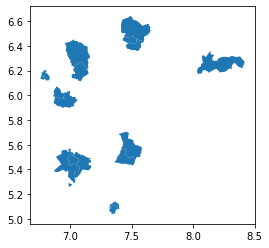

In [31]:
major_city_lga.plot()

In [17]:
water_points = gpd.read_file('../data/Nigeria_-_Water_Points.zip')
water_points.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:
water_points_ss = gpd.sjoin(water_points, data)

In [36]:
major_city_water_points = water_points[water_points['lganame'].isin(major_city_lga['lganame'])]

In [19]:
water_points_ss.shape

(7919, 23)

In [51]:
ss_hex8 = hex_generator(lga,8)['hex8'].to_list()
ss_data = data[data['hex8'].isin(ss_hex8)]

Starting...
Done
Generating hex at level 8
Done


In [54]:
print(f"Population in southeast states Nigeria: {data['pop_sum'].sum():E}")

Population in southeast states Nigeria: 2.483874E+07


In [55]:
major_city_lga_hex8 = hex_generator(major_city_lga,8)['hex8'].to_list()
major_city_data = data[data['hex8'].isin(major_city_lga_hex8)]

Starting...
Done
Generating hex at level 8
Done


In [66]:
print(f"Out of {water_points.shape[0]} water points in Nigeria, {water_points_ss.shape[0]} are in southeast states, taking up {water_points_ss.shape[0]/water_points.shape[0]*100:.0f}%")

Out of 28967 water points in Nigeria, 7919 are in southeast states, taking up 27%


In [74]:
major_city_lga['city'] = major_city_lga['lganame'].apply(lambda x: x.split(' ')[0])

In [76]:
major_city_lga['city'].unique()

array(['Enugu', 'Abakaliki', 'Onitsha', 'Umuahia', 'Owerri', 'Aba',
       'Nnewi', 'Awka'], dtype=object)

In [78]:
major_city_lga = major_city_lga.h3.polyfill(8)

In [84]:
major_city_lga.head()

,FID,globalid,uniq_id,timestamp,editor,lganame,lgacode,statename,statecode,source,amapcode,Shape__Are,Shape__Len,geometry,lganame_check,city,h3_polyfill
41,42,02ede445-db1b-47ea-a2be-e0e0793650e5,28801,2019-08-09,nuraddeen.isah,Enugu South,14005,Enugu,EN,WHO,NIE ENS UWN,0.007420,0.459857,"POLYGON ((7.57482 6.41163, 7.57503 6.40735, 7....",1,Enugu,"[8858d68863fffff, 8858d68ad5fffff, 8858d68b63f..."
96,97,d0137c1c-42fc-4cad-ae97-22869bcfa8b9,28738,2019-08-09,nuraddeen.isah,Abakaliki,11001,Ebonyi,EB,WHO,NIE EBS AKL,0.035925,1.277967,"POLYGON ((8.07510 6.19658, 8.07105 6.17672, 8....",1,Abakaliki,"[8858d0c003fffff, 8858d0c329fffff, 8858d0c223f..."
146,147,6d276304-2bb4-4168-8080-640b5c33287e,28826,2019-08-09,nuraddeen.isah,Enugu East,14003,Enugu,EN,WHO,NIE ENS NKW,0.030227,0.845836,"POLYGON ((7.53994 6.45454, 7.54040 6.45838, 7....",1,Enugu,"[8858d68289fffff, 8858d6810dfffff, 8858d69853f..."
291,292,3b26b6ef-acaa-41d6-9690-7b8e3f46dd1a,28842,2019-08-09,nuraddeen.isah,Enugu North,14004,Enugu,EN,WHO,NIE ENS ENU,0.004837,0.341449,"POLYGON ((7.48429 6.43064, 7.48331 6.42884, 7....",1,Enugu,"[8858d699adfffff, 8858d68a29fffff, 8858d68b59f..."
378,379,28bad07d-261e-4f59-ada6-5836ddf47d88,28755,2019-08-09,nuraddeen.isah,Onitsha South,4018,Anambra,AN,WHO,NIE ANS FGG,0.000683,0.118368,"POLYGON ((6.79113 6.13434, 6.79239 6.13294, 6....",1,Onitsha,"[88588b073dfffff, 88588b054bfffff, 88588b0733f..."


In [90]:
major_city_lga_hex8_dict = major_city_lga.groupby('city').apply(lambda x: [h for hl in x['h3_polyfill'].to_list() for h in hl]).to_dict()

In [101]:
major_city_lga[['FID', 'globalid', 'uniq_id', 'timestamp', 'editor', 'lganame',
       'lgacode', 'statename', 'statecode', 'source', 'amapcode', 'Shape__Are',
       'Shape__Len', 'geometry', 'lganame_check', 'city',]].to_file('../data/ss_major_cities.gpkg', driver='GPKG')

In [103]:
major_city_lga_hex8_dict

{'Aba': ['8882da8d0bfffff',
  '8882da88a1fffff',
  '8882da1201fffff',
  '8882da126bfffff',
  '8882da1247fffff',
  '8882da8d01fffff',
  '8882da1219fffff',
  '8882da8993fffff',
  '8882da8d07fffff',
  '8882da1241fffff',
  '8882da1207fffff',
  '8882da1243fffff',
  '8882da120dfffff',
  '8882da125dfffff',
  '8882da125bfffff',
  '8882da8885fffff',
  '8882da1249fffff',
  '8882da8d03fffff',
  '8882da8d2dfffff',
  '8882da899bfffff',
  '8882da88abfffff',
  '8882da1215fffff',
  '8882da88a9fffff',
  '8882da120bfffff',
  '8882da88a7fffff',
  '8882da88a3fffff',
  '8882da1253fffff',
  '8882da88bdfffff',
  '8882da1203fffff',
  '8882da1245fffff',
  '8882da8d23fffff',
  '8882da1209fffff',
  '8882da121dfffff',
  '8882da8d3dfffff',
  '8882da1257fffff',
  '8882da8d2bfffff',
  '8882da124bfffff',
  '8882da8d1dfffff',
  '8882da8d05fffff',
  '8882da1255fffff',
  '8882da8d25fffff',
  '8882da8d21fffff',
  '8882da8d27fffff',
  '8882da124dfffff',
  '8882da1211fffff',
  '8882da889bfffff',
  '8882da8f2bfffff',
  '888